In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

In [2]:
dataset=pd.read_csv(r'autos.csv',encoding='cp1252')
dataset

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [3]:
dataset.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [4]:
dataset.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

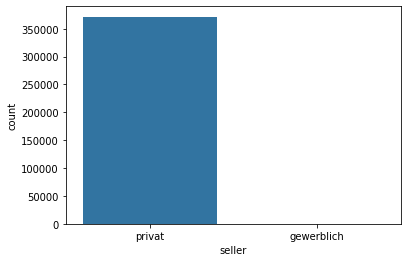

In [5]:
sns.countplot(dataset['seller']) 

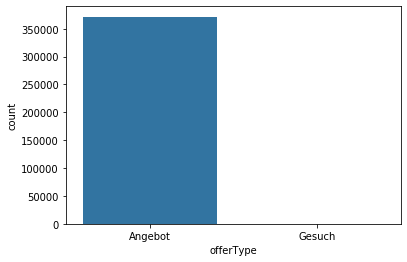

In [6]:
sns.countplot(dataset['offerType']) 

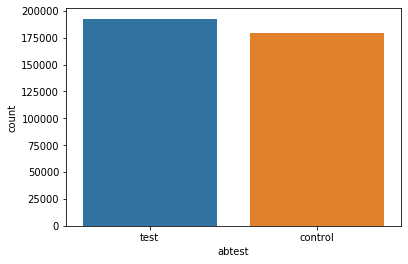

In [7]:
sns.countplot(dataset['abtest']) 

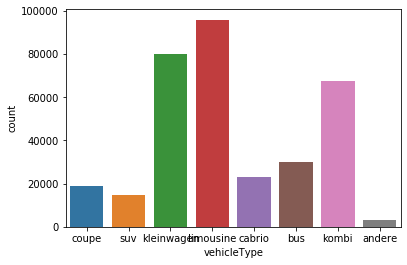

In [8]:
sns.countplot(dataset['vehicleType']) 

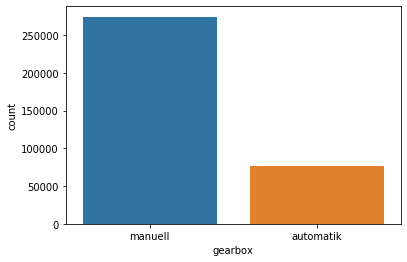

In [9]:
sns.countplot(dataset['gearbox']) 

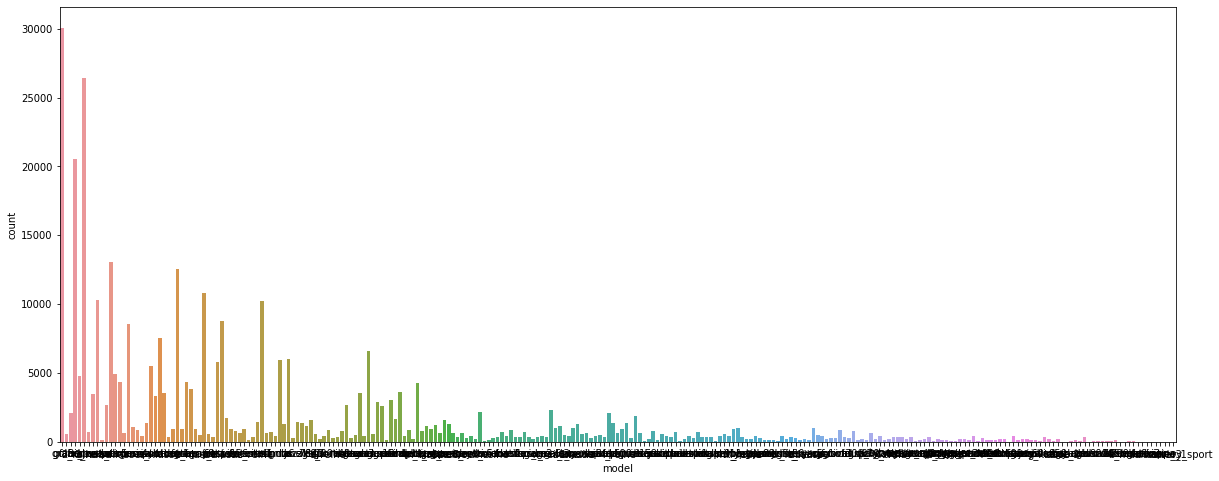

In [10]:
plt.rcParams['figure.figsize']=(20,8) 
sns.countplot(dataset['model']) 

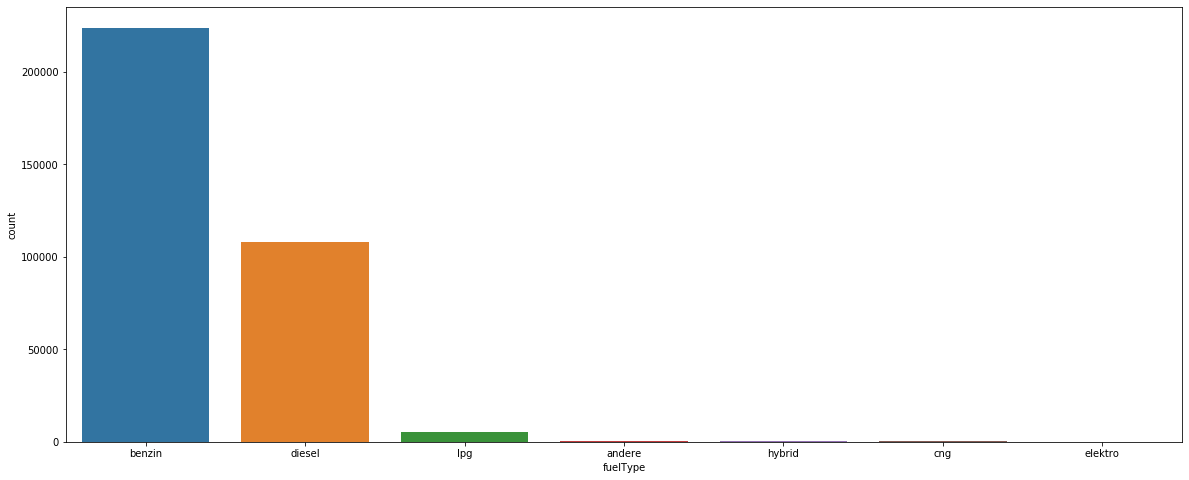

In [11]:
sns.countplot(dataset['fuelType']) 

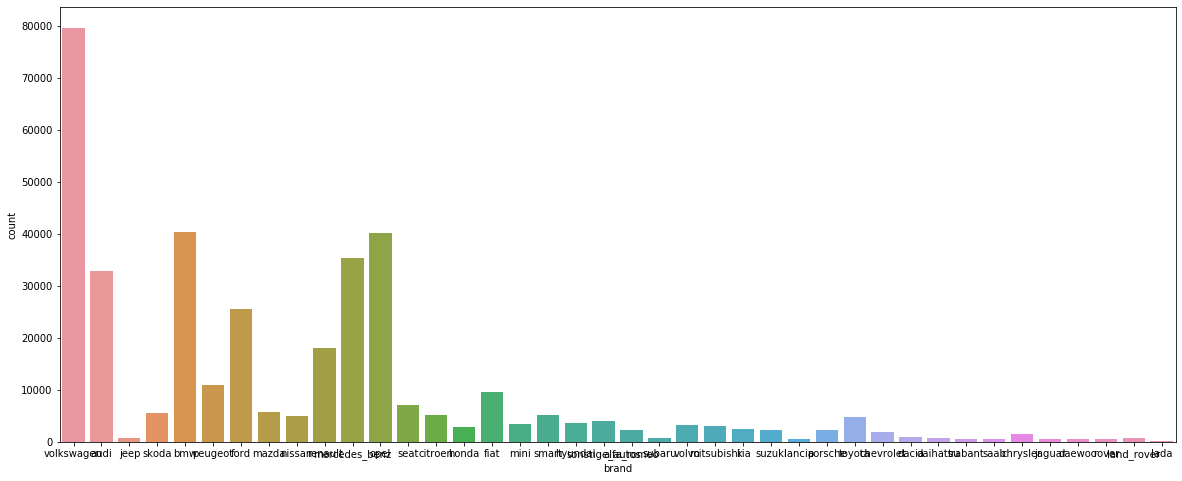

In [12]:
sns.countplot(dataset['brand']) 

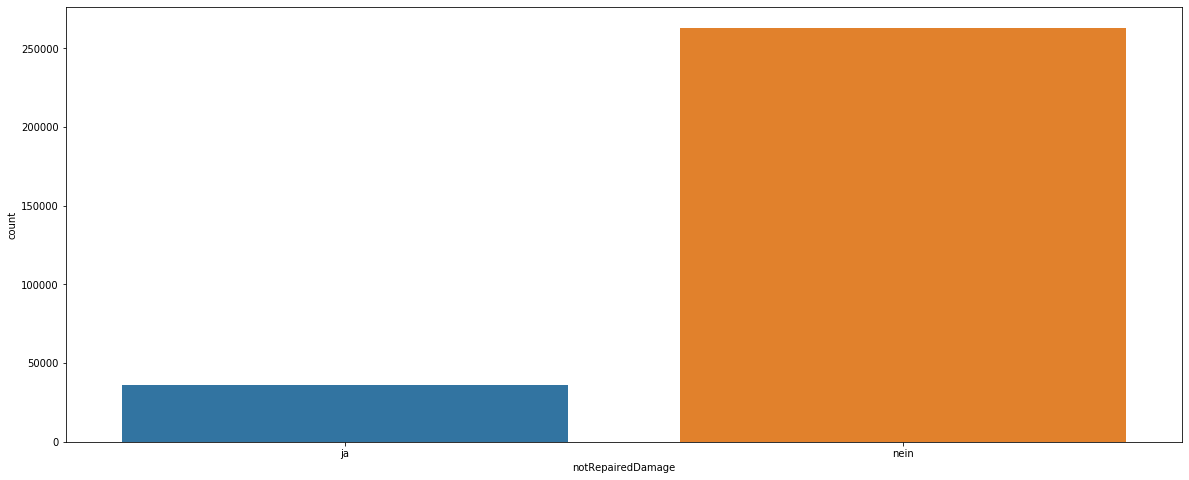

In [13]:
sns.countplot(dataset['notRepairedDamage']) 

Text(0.5, 1.0, 'PowerPS')

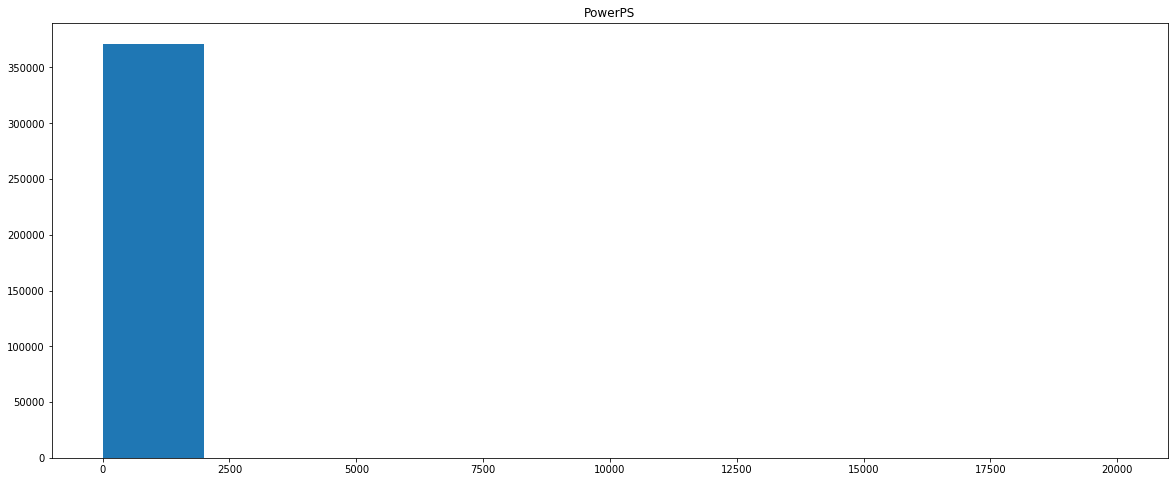

In [14]:
fig, ax = plt.subplots() 
ax.hist(dataset['powerPS']) 
ax.set_title('PowerPS') 

Text(0.5, 1.0, 'kilometer')

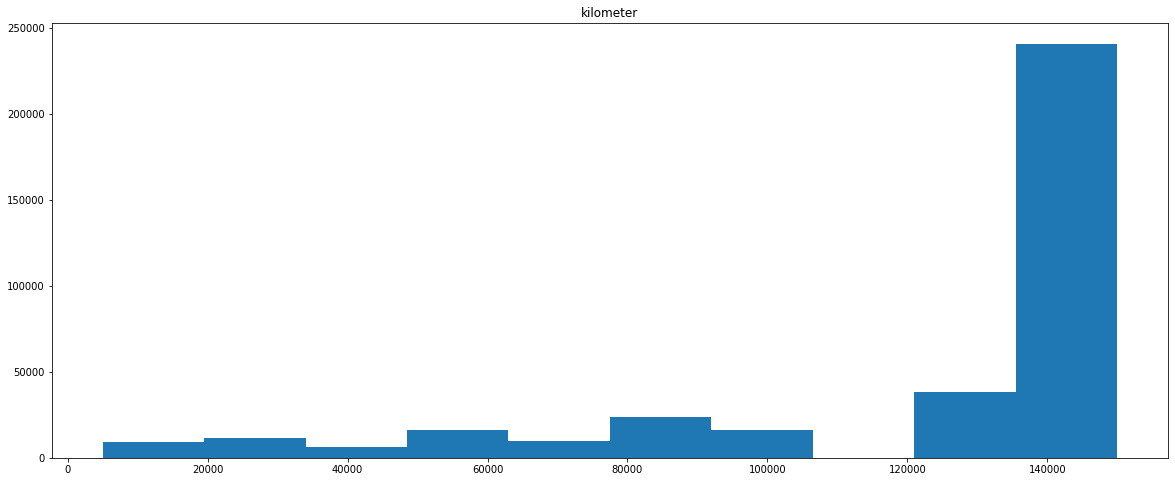

In [15]:
fig, ax = plt.subplots() 
ax.hist(dataset['kilometer']) 
ax.set_title('kilometer') 

Text(0.5, 1.0, 'monthOfRegistration')

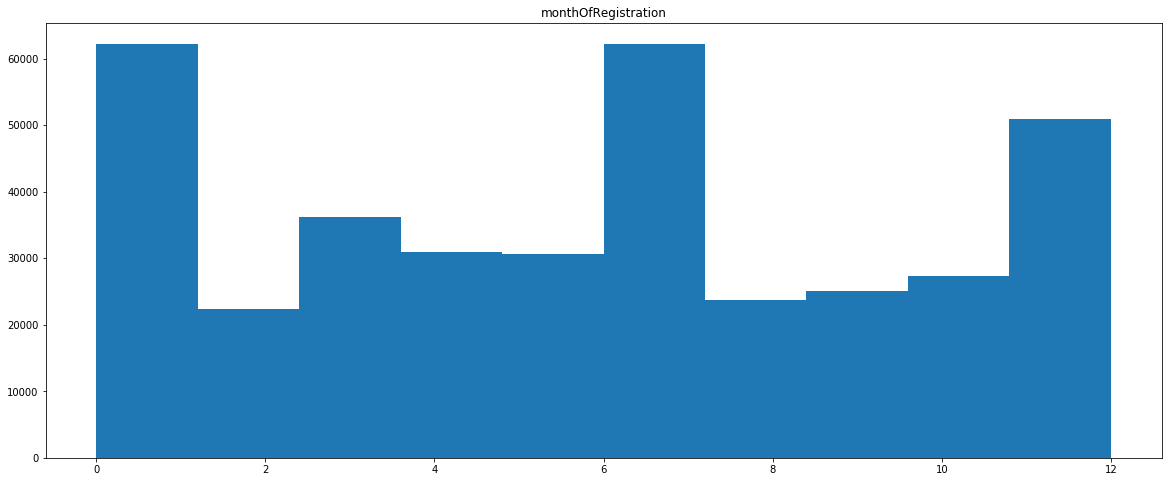

In [16]:
fig, ax = plt.subplots() 
ax.hist(dataset['monthOfRegistration']) 
ax.set_title('monthOfRegistration') 

In [17]:
dataset.drop(['name','seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated','model'], axis='columns', inplace=True)

In [18]:
dataset

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...
371523,2200,NaN,2005,NaN,0,20000,1,NaN,sonstige_autos,NaN
371524,1199,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,150000,6,diesel,volkswagen,NaN


In [19]:
dataset.isnull().sum()

price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [20]:
dataset=dataset.dropna()

In [21]:
dataset

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manuell,190,125000,5,diesel,audi,ja
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,650,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,2200,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
...,...,...,...,...,...,...,...,...,...,...
371520,3200,limousine,2004,manuell,225,150000,5,benzin,seat,ja
371521,1150,bus,2000,manuell,0,150000,3,benzin,opel,nein
371524,1199,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein


In [22]:
dataset.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [23]:
dataset.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,2.680120e+05,268012.000000,268012.000000,268012.000000,268012.000000
mean,1.670892e+04,2003.183384,126.634039,123957.845171,6.165892
std,4.166542e+06,6.710427,155.758016,40018.897080,3.478367
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000
25%,1.500000e+03,1999.000000,77.000000,100000.000000,3.000000
50%,3.800000e+03,2004.000000,116.000000,150000.000000,6.000000
75%,8.600000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,2018.000000,20000.000000,150000.000000,12.000000


In [24]:
dataset['vehicleType'].value_counts()

limousine     78160
kleinwagen    60706
kombi         54451
bus           25501
cabrio        19203
coupe         15334
suv           12675
andere         1982
Name: vehicleType, dtype: int64

In [25]:
dataset['gearbox'].value_counts()

manuell      205177
automatik     62835
Name: gearbox, dtype: int64

In [26]:
dataset['fuelType'].value_counts()

benzin     174476
diesel      88461
lpg          4184
cng           470
hybrid        242
andere         99
elektro        80
Name: fuelType, dtype: int64

In [27]:
dataset['brand'].value_counts()

volkswagen        55213
bmw               30879
mercedes_benz     27264
opel              26959
audi              25122
ford              17777
renault           11922
peugeot            8125
fiat               6511
seat               5096
skoda              4589
mazda              4153
toyota             3757
citroen            3756
nissan             3654
smart              3424
mini               2898
hyundai            2860
volvo              2619
sonstige_autos     2162
mitsubishi         2125
kia                2009
honda              1997
porsche            1880
alfa_romeo         1740
suzuki             1729
chevrolet          1386
chrysler           1064
dacia               733
land_rover          638
jeep                621
subaru              561
daihatsu            530
jaguar              492
saab                426
daewoo              351
lancia              328
rover               288
trabant             225
lada                149
Name: brand, dtype: int64

In [28]:
dataset['notRepairedDamage'].value_counts()

nein    238707
ja       29305
Name: notRepairedDamage, dtype: int64

In [29]:
dataset = dataset[["vehicleType","yearOfRegistration","gearbox","powerPS","kilometer","monthOfRegistration","fuelType","brand","notRepairedDamage","price"]]

In [30]:
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011,manuell,190,125000,5,diesel,audi,ja,18300
3,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,1500
4,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,3600
5,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,650
6,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,2200
...,...,...,...,...,...,...,...,...,...,...
371520,limousine,2004,manuell,225,150000,5,benzin,seat,ja,3200
371521,bus,2000,manuell,0,150000,3,benzin,opel,nein,1150
371524,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,1199
371525,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein,9200


In [31]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
dataset= dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3 + 1.5*IQR))).any(axis=1)]
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011,manuell,190,125000,5,diesel,audi,ja,18300
3,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,1500
4,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,3600
5,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,650
6,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,2200
...,...,...,...,...,...,...,...,...,...,...
371518,kombi,2005,manuell,3,150000,5,diesel,bmw,nein,3999
371520,limousine,2004,manuell,225,150000,5,benzin,seat,ja,3200
371521,bus,2000,manuell,0,150000,3,benzin,opel,nein,1150
371524,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,1199


In [32]:
dataset.shape

(236513, 10)

In [33]:
x=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values

In [34]:
x.shape

(236513, 9)

In [35]:
y.shape

(236513,)

In [36]:
x[0]

array(['coupe', 2011, 'manuell', 190, 125000, 5, 'diesel', 'audi', 'ja'],
      dtype=object)

In [37]:
ct=ColumnTransformer([('on',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 'diesel', 'audi', 'ja'],
       [0.0, 0.0, 0.0, ..., 'benzin', 'volkswagen', 'nein'],
       [0.0, 0.0, 0.0, ..., 'diesel', 'skoda', 'nein'],
       ...,
       [0.0, 1.0, 0.0, ..., 'benzin', 'opel', 'nein'],
       [0.0, 0.0, 1.0, ..., 'benzin', 'smart', 'nein'],
       [0.0, 1.0, 0.0, ..., 'diesel', 'volkswagen', 'nein']], dtype=object)

In [38]:
import joblib
joblib.dump(ct,'transform')

['transform']

In [39]:
x=x[:,1:]
x.shape

(236513, 15)

In [40]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 'manuell', 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [41]:
ct=ColumnTransformer([('on',OneHotEncoder(),[8])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 'diesel', 'audi', 'ja'],
       [0.0, 1.0, 0.0, ..., 'benzin', 'volkswagen', 'nein'],
       [0.0, 1.0, 0.0, ..., 'diesel', 'skoda', 'nein'],
       ...,
       [0.0, 1.0, 1.0, ..., 'benzin', 'opel', 'nein'],
       [1.0, 0.0, 0.0, ..., 'benzin', 'smart', 'nein'],
       [0.0, 1.0, 1.0, ..., 'diesel', 'volkswagen', 'nein']], dtype=object)

In [42]:
import joblib
joblib.dump(ct,'transform1')

['transform1']

In [43]:
x.shape

(236513, 16)

In [44]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [45]:
ct=ColumnTransformer([('on',OneHotEncoder(),[13])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 5, 'audi', 'ja'],
       [0.0, 1.0, 0.0, ..., 6, 'volkswagen', 'nein'],
       [0.0, 0.0, 0.0, ..., 7, 'skoda', 'nein'],
       ...,
       [0.0, 1.0, 0.0, ..., 3, 'opel', 'nein'],
       [0.0, 1.0, 0.0, ..., 3, 'smart', 'nein'],
       [0.0, 0.0, 0.0, ..., 3, 'volkswagen', 'nein']], dtype=object)

In [46]:
import joblib
joblib.dump(ct,'transform2')

['transform2']

In [47]:
x=x[:,1:]
x.shape

(236513, 21)

In [48]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'audi', 'ja'], dtype=object)

In [49]:
ct=ColumnTransformer([('on',OneHotEncoder(),[19])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 125000, 5, 'ja'],
       [0.0, 0.0, 0.0, ..., 150000, 6, 'nein'],
       [0.0, 0.0, 0.0, ..., 90000, 7, 'nein'],
       ...,
       [0.0, 0.0, 0.0, ..., 150000, 3, 'nein'],
       [0.0, 0.0, 0.0, ..., 125000, 3, 'nein'],
       [0.0, 0.0, 0.0, ..., 150000, 3, 'nein']], dtype=object)

In [50]:
import joblib
joblib.dump(ct,'transform3')

['transform3']

In [51]:
x=x[:,1:]
x.shape

(236513, 59)

In [52]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'ja'], dtype=object)

In [53]:
ct=ColumnTransformer([('on',OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[1.0, 0.0, 1.0, ..., 190, 125000, 5],
       [0.0, 1.0, 0.0, ..., 75, 150000, 6],
       [0.0, 1.0, 0.0, ..., 69, 90000, 7],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 150000, 3],
       [0.0, 1.0, 0.0, ..., 101, 125000, 3],
       [0.0, 1.0, 0.0, ..., 102, 150000, 3]], dtype=object)

In [54]:
import joblib
joblib.dump(ct,'transform4')

['transform4']

In [55]:
x.shape

(236513, 60)

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.75225433, -2.75225433,  3.27053585, ...,  1.4996086 ,
        -0.16192709, -0.33635066],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.77153068,
         0.59816829, -0.04959663],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.8900249 ,
        -1.22606063,  0.2371574 ],
       ...,
       [-0.36333851,  0.36333851, -0.30576029, ..., -2.25270846,
         0.59816829, -0.90985871],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.25805571,
        -0.16192709, -0.90985871],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.23830667,
         0.59816829, -0.90985871]])

In [57]:
x[0]

array([ 2.75225433, -2.75225433,  3.27053585, -0.34873538, -0.06885439,
       -0.06489945, -0.12372632, -0.05337956, -0.03833152, -0.0465321 ,
       -0.16195443, -0.27531342, -0.0904676 , -0.10638819, -0.03405646,
       -0.04385485, -0.08820757, -0.02186329, -0.03545876, -0.03920661,
       -0.12965245, -0.31723641, -0.10479151, -0.09225568, -0.11961074,
       -0.34947468, -0.18591736, -0.03323782, -0.22601947, -0.03436615,
       -0.04095283, -0.1433608 , -0.13496269, -0.11800033, -0.06204553,
       -0.04579626, -0.08320143, -0.12330292, -0.02157098, -0.52040725,
       -0.10082243, -1.38284324, -0.04375796,  1.4415663 , -0.01216574,
       -0.02759777, -0.12514539, -0.49096788,  0.49096788, -0.33124431,
       -0.26240212,  4.59301193, -0.56898339, -0.51927865, -0.63941141,
       -0.19618889,  1.50320592,  1.4996086 , -0.16192709, -0.33635066])

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [60]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred=mr.predict(x_test)
y_pred

array([ 1554.33017493,  6147.14658118, 10572.27158118, ...,
        -574.28310632,  6004.49095458,  -660.07079858])

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7132330369499291

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',random_state=0)

In [64]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [65]:
y_pred=dt.predict(x_test)
y_pred

array([1000., 4015., 4750., ...,  610., 2300., 1345.])

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8011791920592324

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,criterion='mse',random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [68]:
y_pred=rf.predict(x_test)
y_pred

array([ 989.37142857, 4231.075     , 9160.35      , ...,  586.41765873,
       4279.23333333, 1354.23333333])

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8682230655467761

In [70]:
import pickle
#saving the model
filename  = 'vehicleresaleprice.pkl'
scalerFile= 'scaler.pkl'
pickle.dump(rf, open(filename, 'wb'))
pickle.dump(sc, open(scalerFile, 'wb'))

In [71]:
x_train[0]

array([ 2.75225433, -2.75225433, -0.30576029, -0.34873538, -0.06885439,
       -0.06489945, -0.12372632, -0.05337956, -0.03833152, -0.0465321 ,
       -0.16195443, -0.27531342, -0.0904676 , -0.10638819, -0.03405646,
       -0.04385485, -0.08820757, -0.02186329, -0.03545876, -0.03920661,
       -0.12965245, -0.31723641, -0.10479151, -0.09225568, -0.11961074,
        2.86143764, -0.18591736, -0.03323782, -0.22601947, -0.03436615,
       -0.04095283, -0.1433608 , -0.13496269, -0.11800033, -0.06204553,
       -0.04579626, -0.08320143, -0.12330292, -0.02157098, -0.52040725,
       -0.10082243,  0.72314777, -0.04375796, -0.69368991, -0.01216574,
       -0.02759777, -0.12514539, -0.49096788,  0.49096788, -0.33124431,
       -0.26240212, -0.21772206, -0.56898339, -0.51927865,  1.56393831,
       -0.19618889, -0.94339063,  0.82814133,  0.59816829, -1.48336677])

In [72]:
y_train[0]

500

In [73]:
out=rf.predict([[2.75225433, -2.75225433, -0.30576029, -0.34873538, -0.06885439,
       -0.06489945, -0.12372632, -0.05337956, -0.03833152, -0.0465321 ,
       -0.16195443, -0.27531342, -0.0904676 , -0.10638819, -0.03405646,
       -0.04385485, -0.08820757, -0.02186329, -0.03545876, -0.03920661,
       -0.12965245, -0.31723641, -0.10479151, -0.09225568, -0.11961074,
        2.86143764, -0.18591736, -0.03323782, -0.22601947, -0.03436615,
       -0.04095283, -0.1433608 , -0.13496269, -0.11800033, -0.06204553,
       -0.04579626, -0.08320143, -0.12330292, -0.02157098, -0.52040725,
       -0.10082243,  0.72314777, -0.04375796, -0.69368991, -0.01216574,
       -0.02759777, -0.12514539, -0.49096788,  0.49096788, -0.33124431,
       -0.26240212, -0.21772206, -0.56898339, -0.51927865,  1.56393831,
       -0.19618889, -0.94339063,  0.82814133,  0.59816829, -1.48336677 ]])
out

array([438.275])

# Observation:

|Algorithm                |Accuracy             |Accuracy in %
|-------------------------|---------------------|--------------
|Multi Linear Regression  | 0.7132389211953192  | 71.3%
|Decision Tree Regressor  | 0.8011791920592324  | 80.1%
|Random Forest Regressor  | 0.8681639422469312  | 86.8%